In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Production of a neutron and an alpha particle, plus a residual

In [70]:
data_bor10 = pd.read_csv('B-10_N,N+A.txt', sep=r'\s+', header=None, engine='python')
data_C12 = pd.read_csv('C-12_N,N+A.txt', sep=r'\s+', header=None, engine='python')
data_Fe56 = pd.read_csv('Fe-56_N,N+A.txt', sep=r'\s+', header=None, engine='python')
data_Xe129 = pd.read_csv('Xe-129_N,N+A.txt', sep=r'\s+', header=None, engine='python')
data_Cd113 = pd.read_csv('Cd-113_N,N+A.txt', sep=r'\s+', header=None, engine='python')


data_Fe56 = data_Fe56[data_Fe56[0] <= 60]
data_bor10 = data_bor10[data_bor10[0] <= 60]
data_C12 = data_C12[data_C12[0] <= 60]
data_Xe129 = data_Xe129[data_Xe129[0] <= 60]

data_Fe56 = data_Fe56[data_Fe56[1] > 0]
data_bor10 = data_bor10[data_bor10[1] > 0]
data_C12 = data_C12[data_C12[1] > 0]
data_Xe129 = data_Xe129[data_Xe129[1] > 0]
data_Cd113 = data_Cd113[data_Cd113[1] > 0]

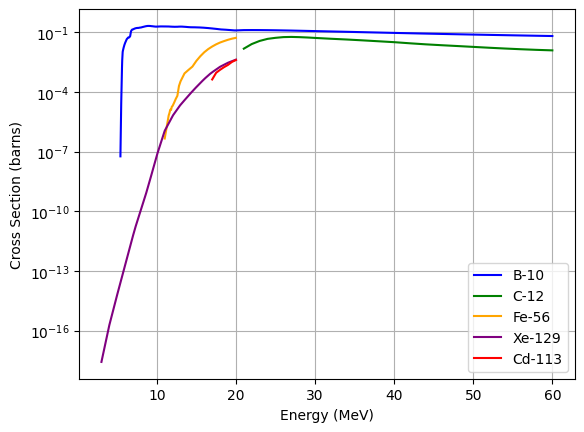

In [72]:
plt.plot(data_bor10[0], data_bor10[1], '-', label='B-10', color='blue')
plt.plot(data_C12[0], data_C12[1], '-', label='C-12', color='green')
plt.plot(data_Fe56[0], data_Fe56[1], '-', label='Fe-56', color='orange')
plt.plot(data_Xe129[0], data_Xe129[1], '-', label='Xe-129', color='purple')
plt.plot(data_Cd113[0], data_Cd113[1], '-', label='Cd-113', color='red')
plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (barns)')
#plt.xscale('log') 
plt.yscale('log') 
plt.grid()
plt.legend()

# (N,gamma) prozess


In [59]:
data_bor10 = pd.read_csv('B-10_N,G.txt', sep=r'\s+', header=None, engine='python')
data_H1 = pd.read_csv('H-1_N,G.txt', sep=r'\s+', header=None, engine='python')
data_C12 = pd.read_csv('C-12_N,G.txt', sep=r'\s+', header=None, engine='python')
data_Fe56 = pd.read_csv('Fe-56_N,G.txt', sep=r'\s+', header=None, engine='python')
data_Xe129 = pd.read_csv('Xe-129_N,G.txt', sep=r'\s+', header=None, engine='python')
data_Cd113 = pd.read_csv('Cd-113_N,G.txt', sep=r'\s+', header=None, engine='python')

data_Fe56 = data_Fe56[data_Fe56[0] <= 20]

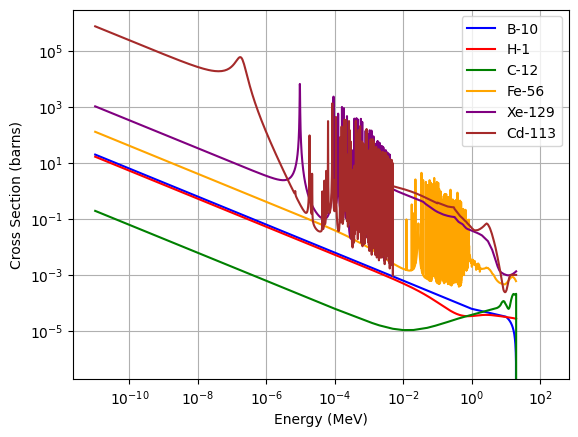

In [60]:
plt.plot(data_bor10[0], data_bor10[1], '-', label='B-10', color='blue')
plt.plot(data_H1[0], data_H1[1], '-', label='H-1', color='red')
plt.plot(data_C12[0], data_C12[1], '-', label='C-12', color='green')
plt.plot(data_Fe56[0], data_Fe56[1], '-', label='Fe-56', color='orange')
plt.plot(data_Xe129[0], data_Xe129[1], '-', label='Xe-129', color='purple')
plt.plot(data_Cd113[0], data_Cd113[1], '-', label='Cd-113', color='brown')
plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (barns)')
plt.xscale('log') 
plt.yscale('log') 
plt.grid()
plt.legend()

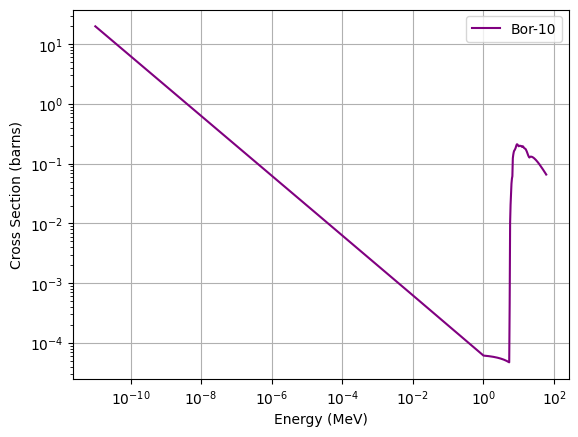

In [75]:
    
# Beispiel: Zwei Tabellen mit unterschiedlichen Bins einlesen
data1 = pd.read_csv('B-10_N,G.txt', sep=r'\s+', header=None, engine='python')  # Tabelle 1
data2 = pd.read_csv('B-10_N,N+A.txt', sep=r'\s+', header=None, engine='python')  # Tabelle 2

# Gemeinsame Bins definieren (z. B. logarithmisch verteilt)
common_bins = np.logspace(
    start=np.log10(min(data1[0].min(), data2[0].min())),
    stop=np.log10(max(data1[0].max(), data2[0].max())),
    num=1000  # Anzahl der Bins
)

# Interpolation auf die gemeinsamen Bins
data1_interp = np.interp(common_bins, data1[0], data1[1])  # Interpolation von Tabelle 1
data2_interp = np.interp(common_bins, data2[0], data2[1])  # Interpolation von Tabelle 2

# Addition der interpolierten Werte
result = data1_interp + data2_interp

# Ergebnis plotten
plt.plot(common_bins, result, label='Bor-10', color='purple')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (barns)')
plt.grid()
plt.legend()
plt.show()